<a href="https://colab.research.google.com/github/saravananmaran/ALDS/blob/main/DAY02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EXNO 2.1 (LIMM)

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc1 = nlp(u'I am a runner running in a race because I love to run since I ran today')

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

I 	 PRON 	 4690420944186131903 	 I
am 	 AUX 	 10382539506755952630 	 be
a 	 DET 	 11901859001352538922 	 a
runner 	 NOUN 	 12640964157389618806 	 runner
running 	 VERB 	 12767647472892411841 	 run
in 	 ADP 	 3002984154512732771 	 in
a 	 DET 	 11901859001352538922 	 a
race 	 NOUN 	 8048469955494714898 	 race
because 	 SCONJ 	 16950148841647037698 	 because
I 	 PRON 	 4690420944186131903 	 I
love 	 VERB 	 3702023516439754181 	 love
to 	 PART 	 3791531372978436496 	 to
run 	 VERB 	 12767647472892411841 	 run
since 	 SCONJ 	 10066841407251338481 	 since
I 	 PRON 	 4690420944186131903 	 I
ran 	 VERB 	 12767647472892411841 	 run
today 	 NOUN 	 11042482332948150395 	 today


In [ ]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_} ')

In [ ]:
doc2 = nlp(u'I saw eighteen mice today!')
show_lemmas(doc2)

I            PRON         4690420944186131903    I 
saw          VERB         11925638236994514241   see 
eighteen     NUM          9609336664675087640    eighteen 
mice         NOUN         1384165645700560590    mouse 
today        NOUN         11042482332948150395   today 
!            PUNCT        17494803046312582752   ! 


In [ ]:
doc2 = nlp(u' hello , i am saravanan and what about you !')
show_lemmas(doc2)

             SPACE  8532415787641010193      
hello        INTJ   5983625672228268878    hello 
,            PUNCT  2593208677638477497    , 
i            PRON   4690420944186131903    I 
am           AUX    10382539506755952630   be 
saravanan    ADJ    3847582071441213919    saravanan 
and          CCONJ  2283656566040971221    and 
what         PRON   5865838185239622912    what 
about        ADP    942632335873952620     about 
you          PRON   7624161793554793053    you 
!            PUNCT  17494803046312582752   ! 


## EXNO 2.2 (STOP WORDS)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
print( nlp.Defaults.stop_words)

{'get', 'none', "'d", 'seeming', 'around', 'bottom', 'besides', 'four', 'to', 'ours', 'elsewhere', 'becoming', 'doing', 'whether', 'wherever', 'somehow', 'you', 'am', 'else', 'fifty', 'least', "'ll", 'became', 'down', 'latterly', 'therein', "n't", 'many', 'top', 'toward', "'m", 'few', 'myself', 'anywhere', 'something', 'though', 'amount', 'herein', 'sometime', 'seem', 'becomes', 'being', '‘ve', 'which', 'much', "'re", 'whereas', 'others', 'whence', '‘d', 'those', 'against', 'of', 'using', '‘re', 'while', 'third', 'them', 'two', 'part', 'someone', 'will', 'beside', 'how', 'really', 'itself', 'whereafter', 'only', 'anyhow', 'his', 'put', 'now', 'off', 'every', 'their', '’d', 'nothing', 'former', 'wherein', 'all', 'whom', 'it', 'hereupon', 'several', 'me', 'sixty', 'into', 'a', 'often', 'nine', 'over', 'here', 'become', 'serious', 'n’t', 'please', 'at', 'everything', 'among', 'about', 'same', 'with', 'mine', 'still', 'thereafter', 'upon', 'perhaps', 'n‘t', 'seemed', 'very', 'forty', 'unde

In [ ]:
len(nlp.Defaults.stop_words)

326

In [ ]:
nlp.vocab['myself'].is_stop

True

In [ ]:
nlp.vocab['mystery'].is_stop

False

In [ ]:
#TO ADD A STOP WORD
nlp.Defaults.stop_words.add('btw')
nlp.vocab['btw'].is_stop = True

In [ ]:
len(nlp.Defaults.stop_words)

328

## EXNO 2.3 (VOCABULARY AND MATCHING)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

In [ ]:
pattern1 = [{'LOWER': 'solarpower'}]
pattern2 = [{'LOWER': 'solar'}, {'LOWER': 'power'}]
pattern3 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}]

In [ ]:
matcher.add('SolarPower',[pattern1, pattern2, pattern3])

In [ ]:
doc = nlp(u'The solar Power industry continues to grow as demand for solarpower increases. Solar-power cars are gaining popularity.')

In [ ]:
found_matches = matcher(doc)
print(found_matches)

[(8656102463236116519, 1, 3), (8656102463236116519, 10, 11), (8656102463236116519, 13, 16)]


In [ ]:
for match_id, start, end in found_matches:
  string_id = nlp.vocab.strings[match_id]
  span = doc[start:end]
  print(match_id, string_id, start, end, span.text)

8656102463236116519 SolarPower 1 3 solar Power
8656102463236116519 SolarPower 10 11 solarpower
8656102463236116519 SolarPower 13 16 Solar-power


In [ ]:
doc2 = nlp(u'Solar-powered energy runs solar-powered cars.')


In [ ]:
found_matches = matcher(doc2)
print(found_matches)

[]


In [ ]:
matcher.remove('SolarPower')

In [ ]:
pattern4 =[ {'LOWER': 'solar'}, {'IS_PUNCT': True, 'OP':'*'}, {'LOWER': 'powered'}]
matcher.add('SolarPower', [pattern1, pattern2, pattern3,pattern4])

In [ ]:
found_matches = matcher(doc2)
print(found_matches)

[(8656102463236116519, 0, 3), (8656102463236116519, 5, 8)]


In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
pwd

'/content'

In [ ]:
with open('reaganomics.txt', encoding='unicode_escape') as f:
  doc3 = nlp(f.read())

In [ ]:
phrase_list = ['voodoo economics', 'supply-side economics', 'trickle-down economics', 'free-market economics']
phrase_patterns = [nlp(text) for text in phrase_list]
matcher.add('voodoo economics', None, *phrase_patterns)
matches = matcher(doc3)

In [ ]:
matches

[(17837497533087405160, 41, 45),
 (3680293220734633682, 41, 45),
 (17837497533087405160, 49, 53),
 (3680293220734633682, 49, 53),
 (17837497533087405160, 54, 56),
 (3680293220734633682, 54, 56),
 (17837497533087405160, 61, 65),
 (3680293220734633682, 61, 65),
 (17837497533087405160, 673, 677),
 (3680293220734633682, 673, 677),
 (17837497533087405160, 2986, 2990),
 (3680293220734633682, 2986, 2990)]

In [ ]:
doc3[:70]

REAGANOMICS
https://en.wikipedia.org/wiki/Reaganomics

Reaganomics (a portmanteau of [Ronald] Reagan and economics attributed to Paul Harvey)[1] refers to the economic policies promoted by U.S. President Ronald Reagan during the 1980s. These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.


In [ ]:
doc3[665:685]

same time he attracted a following from the supply-side economics movement, which formed in opposition to Keynesian

In [ ]:
doc3[2986:2990]

trickle-down economics

In [ ]:
sents = [sent for sent in doc3.sents]
print(sents[0].start, sents[0].end)

0 35


In [ ]:
for sent in sents:
  if matches[4][1] < sent.end:
    print(sent)
    break

These policies are commonly associated with supply-side economics, referred to as trickle-down economics or voodoo economics by political opponents, and free-market economics by political advocates.




##EXNO 2.4 (PARTS OF SPEECH)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")
print(doc.text)

The quick brown fox jumped over the lazy dog's back.


In [ ]:
print(doc[2].text, doc[2].pos_, doc[2].tag_, spacy.explain(doc[2].tag_))

brown ADJ JJ adjective (English), other noun-modifier (Chinese)


In [ ]:
for token in doc:
  print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
quick      ADJ      JJ     adjective (English), other noun-modifier (Chinese)
brown      ADJ      JJ     adjective (English), other noun-modifier (Chinese)
fox        NOUN     NN     noun, singular or mass
jumped     VERB     VBD    verb, past tense
over       ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
lazy       ADJ      JJ     adjective (English), other noun-modifier (Chinese)
dog        NOUN     NN     noun, singular or mass
's         PART     POS    possessive ending
back       NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer


In [ ]:
doc = nlp(u'I read books on NLP.')
r = doc[1]
print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBP    verb, non-3rd person singular present


In [ ]:
Dep_Count = doc.count_by(spacy.attrs.DEP)
for k,v in sorted(Dep_Count.items()):
  print(f'{k}.{doc.vocab[k].text:{5}}: {v}')

416.dobj : 1
429.nsubj: 1
439.pobj : 1
443.prep : 1
445.punct: 1
8206900633647566924.ROOT : 1


In [ ]:
from spacy import displacy

In [ ]:
doc = nlp(u'The quick brown fox jumped over the lazy dog')
for token in doc:
  print(f'{token.text:{10}} {token.pos_:{7}} {token.dep_:{7}} {spacy.explain(token.dep_)}')

The        DET     det     determiner
quick      ADJ     amod    adjectival modifier
brown      ADJ     amod    adjectival modifier
fox        NOUN    nsubj   nominal subject
jumped     VERB    ROOT    root
over       ADP     prep    prepositional modifier
the        DET     det     determiner
lazy       ADJ     amod    adjectival modifier
dog        NOUN    pobj    object of preposition


In [ ]:
displacy.render(doc,style='dep',jupyter=True,options={'distance':110})


In [ ]:
doc2=nlp(u"This is a sentence. This is another sentence, possibly longer than the other.")
spans = list(doc2.sents)
options = {'distance':110,'compact':'True','color':'yellow','bg':'#09a3d','font':'Times'}
displacy.render(spans,style='dep',jupyter=True,options=options)

In [ ]:
displacy.serve(spans,style='dep',options=options)

/usr/local/lib/python3.12/dist-packages/spacy/displacy/__init__.py:108: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [ ]:
def show_ents(doc):
  if doc.ents:
    for ent in doc.ents:
      print(ent.text + '-' + ent.label_ + '-' + str(spacy.explain(ent.label_)))
  else:
    print('No entities found')

In [ ]:
doc = nlp(U'May I go to Washington, DC next May to see the Washington Monument?')
show_ents(doc)


Washington, DC-GPE-Countries, cities, states
next May-DATE-Absolute or relative dates or periods
the Washington Monument-ORG-Companies, agencies, institutions, etc.


In [ ]:
doc = nlp(u'Can I please borrow 500 dollars from you to buy some Microsoft stock?')
for ent in doc.ents:
  print(ent.text, ent.start, ent.end, ent.start_char, ent.end_char, ent.label_)

500 dollars 4 6 20 31 MONEY
Microsoft 11 12 53 62 ORG


In [ ]:
doc = nlp(u'Tesla to build a U.K. factory for $6 million')
show_ents(doc)

U.K.-GPE-Countries, cities, states
$6 million-MONEY-Monetary values, including unit


In [ ]:
from types import new_class
doc=nlp(U'Tesla to build a U.K. factory for $6 million')
ORG = doc.vocab.strings[u'ORG']
new_ent = spacy.tokens.Span(doc,0,1,label=ORG)
doc.ents = list(doc.ents) + [new_ent]
show_ents(doc)

Tesla-ORG-Companies, agencies, institutions, etc.
U.K.-GPE-Countries, cities, states
$6 million-MONEY-Monetary values, including unit


In [ ]:
doc = nlp(u"our company created a brand new vacuum cleaner.")
show_ents(doc)

No entities found


In [ ]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [ ]:
doc = nlp(u"our company created a brand new vacuum cleaner. " + u"If sucessfull , the vaccum cleaner will be our first product")
Phrase_list = ['vacuum cleaner','vacuum-cleaner']
phrase_patterns = [nlp(text) for text in Phrase_list]
matcher.add('newproduct',None,*phrase_patterns)
matches = matcher(doc)
matches

[(2689272359382549672, 6, 8)]

##EXNO 2.5  (SENTENCE WISE)

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp(u'This is the first sentence. This is another sentence. This is the last sentence.')
for sent in doc.sents:
  print(sent)

This is the first sentence.
This is another sentence.
This is the last sentence.


In [ ]:
print(doc[1])

is


In [ ]:
sentences = list(doc.sents)
print(sentences[1])

This is another sentence.


In [ ]:
doc_sents = [sent for sent in doc.sents]
doc_sents

[This is the first sentence.,
 This is another sentence.,
 This is the last sentence.]

In [ ]:
type(doc_sents[1])

spacy.tokens.span.Span

In [ ]:
print(doc_sents[1].start, doc_sents[1].end)

6 11


In [ ]:
doc2 = nlp(u'This is a sentence. This is a sentence. - This is a sentence.')
for sent in doc2:
  print(token.is_sent_start, ' '+token.text)

False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog
False  dog


In [ ]:
doc = nlp(u'"mangement is doing the right things; leadership is doing the right things." -peter Drucker')
for sent in doc.sents:
  print(sent)
  print('\n')


"mangement is doing the right things; leadership is doing the right things."


-peter


Drucker




In [ ]:
doc

"mangement is doing the right things; leadership is doing the right things." -peter Drucker

In [ ]:
doc[:-1]

"mangement is doing the right things; leadership is doing the right things." -peter

In [ ]:
from spacy.language import Language
@Language.component("set_custom_boundaries")
def set_custom_boundaries(doc):
  for token in doc[:-1]:
    if token.text == ';':
      doc[token.i+1].is_sent_start = True
  return doc


In [ ]:
nlp.add_pipe("set_custom_boundaries", before='parser')
print(nlp.pipe_names)

['tok2vec', 'tagger', 'set_custom_boundaries', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [ ]:
doc4=nlp(u'"mangement is doing the right things;  leadership is doing the right things." -peter Drucker')
for sent in doc4.sents:
  print(sent)

"mangement is doing the right things;
 
leadership is doing the right things."
-peter
Drucker


In [ ]:
doc4[4]

the

In [ ]:
doc4[4].is_sent_start = True

ValueError: [E043] Refusing to write to token.sent_start if its document is parsed, because this may cause inconsistent state.

In [ ]:
nlp = spacy.load('en_core_web_sm')
mystring = u"This is a sentence. This is another.\n\nThis is a \nthird sentence."
doc = nlp(mystring)
for sent in doc.sents:
  print([token.text for token in sent])



##EXNO  2.6  (ML ALGORITHM)

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('smsspamcollection.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [ ]:
len(df)

5572

In [ ]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [ ]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


In [ ]:
df['label'].describe()

,label
count,5572
unique,2
top,ham
freq,4825


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

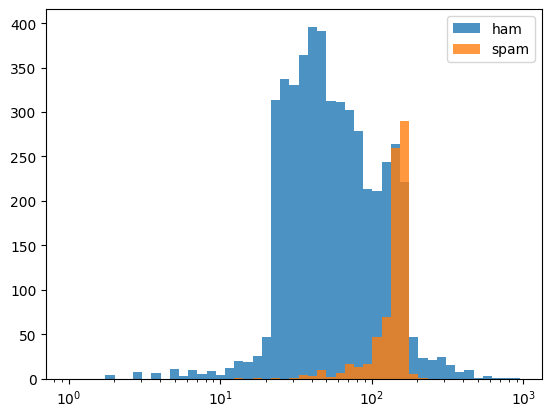

In [ ]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
df['punct'].describe()

,punct
count,5572.000000
mean,4.177495
std,4.623919
min,0.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,133.000000


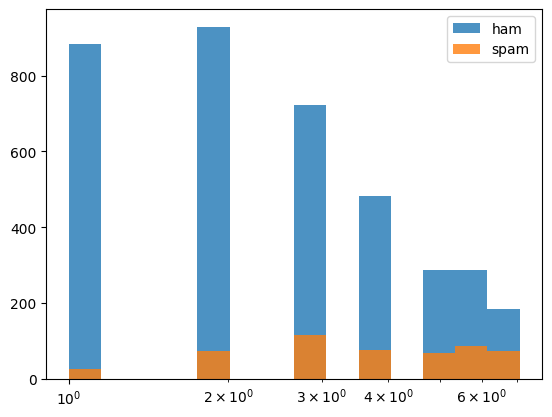

In [ ]:
plt.xscale('log')
bins = 1.15**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [ ]:
x = df[['length','punct']]
y = df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)
print("Training data shape : ",x_train.shape)
print("Test data shape : ",x_test.shape)

Training data shape :  (3733, 2)
Test data shape :  (1839, 2)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
from sklearn import metrics
predictions = lr_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1547   46]
 [ 241    5]]


In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.843936922240348


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
from sklearn import metrics
predictions = nb_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))

[[1583   10]
 [ 246    0]]


In [ ]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions),index=['ham','spam'],columns=['ham','spam'])
df

,ham,spam
ham,1583,10
spam,246,0


In [ ]:
print(metrics.accuracy_score(y_test,predictions))

0.8607939097335509


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train,y_train)

MultinomialNB()

In [ ]:
predictions = nb_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[1583   10]
 [ 246    0]]
0.8607939097335509


In [ ]:
from sklearn.svm import SVC
svc_model = SVC(gamma='auto')
svc_model.fit(x_train,y_train)

SVC(gamma='auto')

In [ ]:
predictions = svc_model.predict(x_test)
print(metrics.confusion_matrix(y_test,predictions))
print(metrics.accuracy_score(y_test,predictions))

[[1515   78]
 [ 131  115]]
0.8863512778684067
